# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [2]:
df = pd.read_csv('AP003.csv')
df

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,2023-03-31 19:00:00,2023-03-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50396,2023-03-31 20:00:00,2023-03-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50397,2023-03-31 21:00:00,2023-03-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50398,2023-03-31 22:00:00,2023-03-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Read the dataset and show the first five rows

In [3]:
df.shape

(50400, 23)

Show how many rows and columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

Show the missing value for each column, and the data type for each column

# Convert date column to datetime

In [5]:
df['From Date'] = pd.to_datetime(df['From Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [6]:
df = df.sort_values(by='From Date')

In [7]:
df = df.drop(columns=['From Date'])

Preprocess a datetime column in a pandas DataFrame. First, it converts the `'From Date'` column to datetime format using the `pd.to_datetime()` function with a specified format (`'%Y-%m-%d %H:%M:%S'`). The `errors='coerce'` argument ensures that any invalid date formats are replaced with `NaT` (Not a Time), preventing the process from breaking. After conversion, the DataFrame is sorted in ascending order based on the new `'From Date'` values. Finally, the `'From Date'` column is dropped from the DataFrame, possibly because it is no longer needed or has been replaced with another derived time feature. This process is typically used to prepare data for time-based analysis or modeling.

# EDA

In [8]:
category= []
numerical= []

for i in df.columns:
  if 'int'in str(df[i].dtype) or 'float' in str(df[i].astype):
    numerical.append(i)
  elif 'object'in str(df[i].dtype) :
    category.append(i)

print(f'Categorial Columns: {category}')
print(f'Numerical Columns: {numerical}')

Categorial Columns: ['To Date']
Numerical Columns: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']


This code is designed to categorize the columns of a DataFrame into numerical and categorical types. It starts by initializing two empty lists: one for categorical columns (`category`) and one for numerical columns (`numerical`). Then, it iterates through each column in the DataFrame `df` and checks the data type. If the data type contains `'int'` or `'float'`, the column is considered numerical and added to the `numerical` list. If the data type is `'object'`, which typically indicates string or categorical data, the column is added to the `category` list. Finally, the code prints out the lists of identified categorical and numerical columns, which can be useful for further data preprocessing and analysis

In [ ]:
df[numerical].describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,38878.000000,39156.000000,40293.000000,39750.000000,41083.000000,39812.000000,38132.000000,41034.000000,39405.000000,40733.000000,...,40391.000000,40575.000000,40575.000000,38765.000000,41098.000000,37718.000000,41098.000000,40425.000000,41182.000000,40733.000000
mean,45.565906,108.346390,13.293970,34.836941,28.490585,12.905785,11.914075,0.664604,30.797760,3.381706,...,29.571698,73.090195,2.012917,204.795334,130.176687,746.731044,0.015478,27.587880,0.023109,2.633167
std,34.786245,71.262919,21.393259,24.736763,26.662755,14.874653,10.332371,0.526471,30.742216,3.041544,...,3.382998,8.428454,1.184972,67.757402,179.120235,8.106764,0.072018,4.460388,0.285185,7.150126
min,0.250000,1.000000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,0.000000,...,6.700000,15.750000,0.100000,7.000000,0.000000,700.000000,-0.550000,5.180000,0.000000,0.000000
25%,22.750000,61.750000,2.670000,17.380000,11.770000,6.400000,6.150000,0.340000,9.700000,1.450000,...,28.000000,68.000000,1.050000,151.250000,6.000000,742.670000,0.000000,24.820000,0.000000,0.620000
50%,37.500000,94.750000,5.550000,29.800000,21.600000,10.700000,10.380000,0.600000,19.270000,2.780000,...,29.050000,74.250000,1.930000,214.500000,8.250000,747.000000,0.000000,27.650000,0.000000,1.400000
75%,60.500000,133.750000,15.080000,44.430000,35.400000,15.280000,15.000000,0.880000,41.080000,4.530000,...,30.450000,79.330000,2.830000,258.330000,232.000000,751.000000,0.050000,30.430000,0.000000,2.950000
max,840.000000,904.000000,419.780000,420.200000,408.250000,454.900000,194.250000,11.280000,199.300000,91.000000,...,59.880000,92.000000,7.970000,360.000000,730.000000,770.000000,1.680000,48.500000,12.500000,337.430000


The line `df[numerical].describe()` is used to generate **summary statistics** for all numerical columns in the DataFrame. It produces key descriptive statistics such as count, mean, standard deviation (std), minimum, 25th percentile (25%), median (50%), 75th percentile (75%), and maximum for each numerical feature. This helps provide a quick overview of the distribution and spread of numerical data, allowing you to identify potential outliers, skewed data, or irregularities that may require further preprocessing

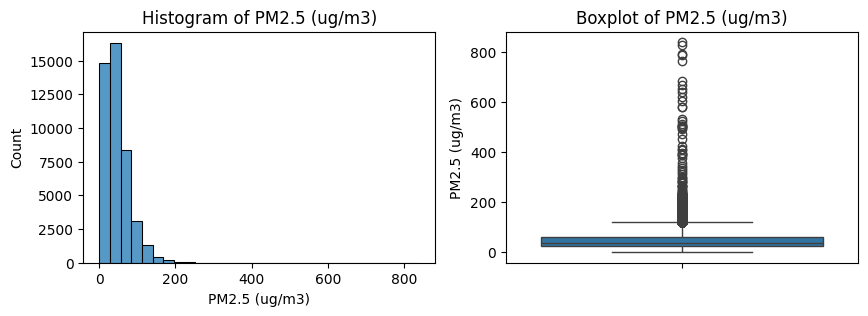

PM2.5 (ug/m3)- skewness: 3.8120308404033265
PM2.5 (ug/m3)- kurtosis: 48.48340018970142


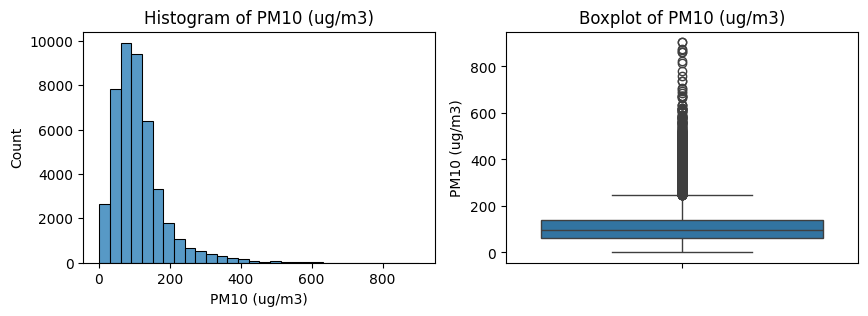

PM10 (ug/m3)- skewness: 2.1486766161738498
PM10 (ug/m3)- kurtosis: 8.227009584889002


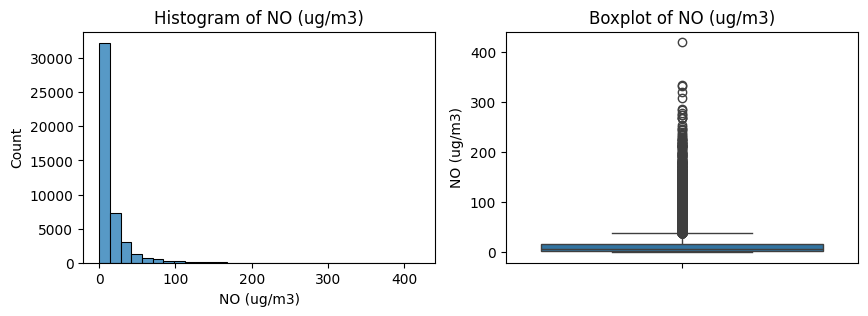

NO (ug/m3)- skewness: 4.012152541960519
NO (ug/m3)- kurtosis: 25.31812501114471


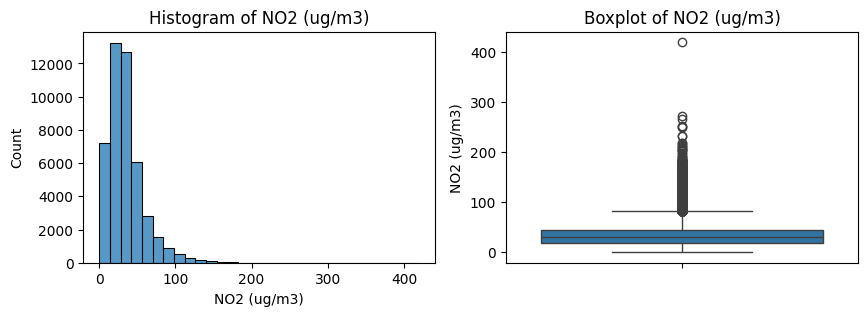

NO2 (ug/m3)- skewness: 1.927265504801719
NO2 (ug/m3)- kurtosis: 7.248969095628038


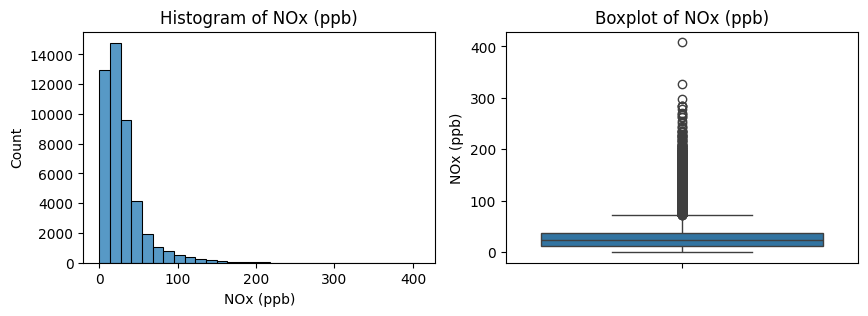

NOx (ppb)- skewness: 2.5908837540692913
NOx (ppb)- kurtosis: 10.443009518551188


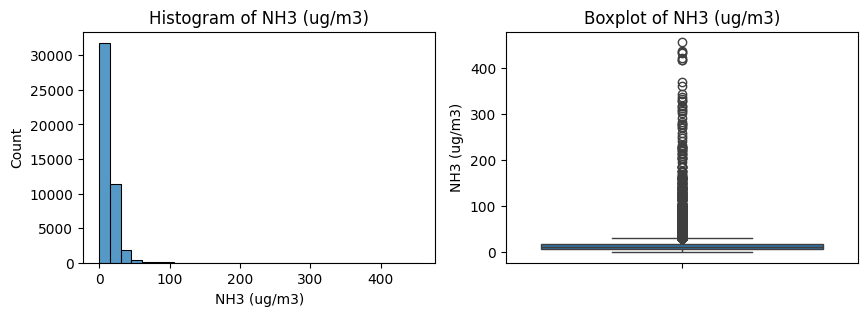

NH3 (ug/m3)- skewness: 10.591016268361521
NH3 (ug/m3)- kurtosis: 208.4797057356495


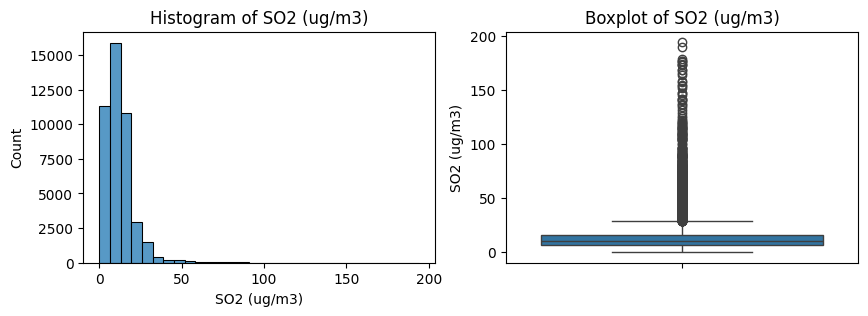

SO2 (ug/m3)- skewness: 4.648163051137525
SO2 (ug/m3)- kurtosis: 45.213892212912924


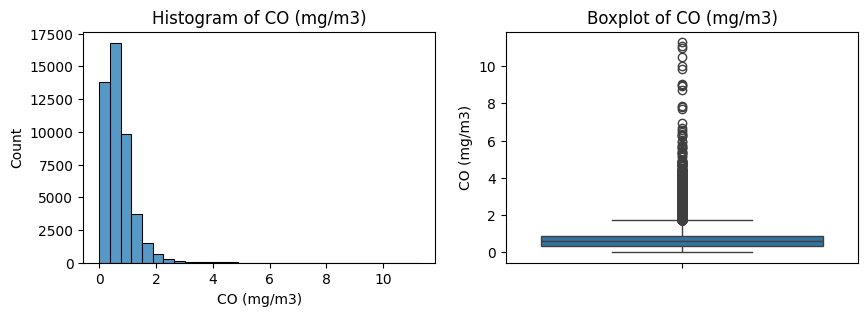

CO (mg/m3)- skewness: 3.086232178353527
CO (mg/m3)- kurtosis: 28.728343935521593


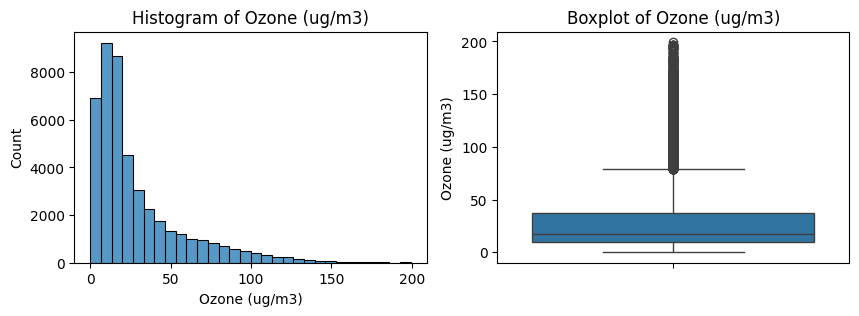

Ozone (ug/m3)- skewness: 1.8824009979882446
Ozone (ug/m3)- kurtosis: 3.7433378247036684


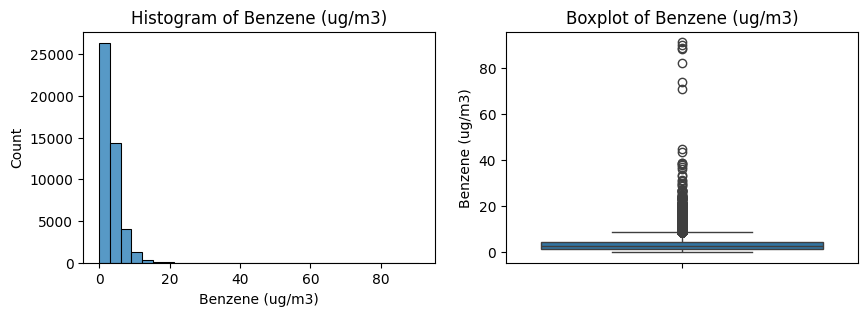

Benzene (ug/m3)- skewness: 5.031570891167827
Benzene (ug/m3)- kurtosis: 97.29771288713901


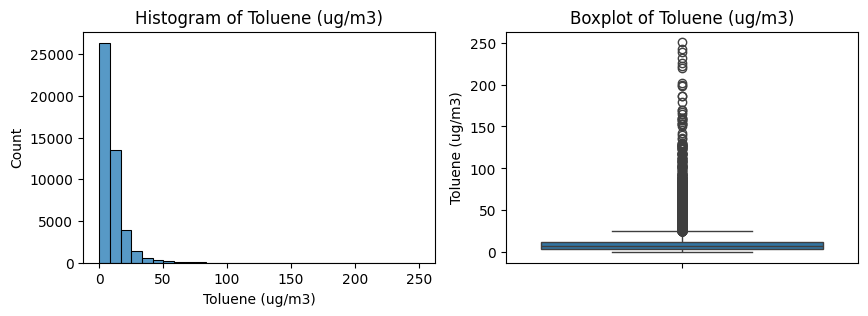

Toluene (ug/m3)- skewness: 5.3228497794262015
Toluene (ug/m3)- kurtosis: 59.384152198403164


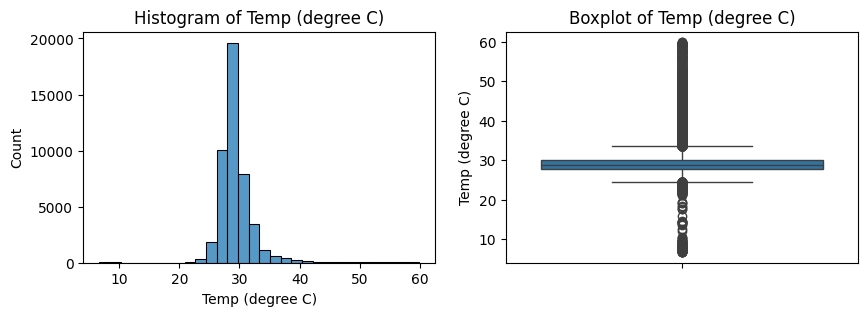

Temp (degree C)- skewness: 2.8674251310339836
Temp (degree C)- kurtosis: 22.39783007499976


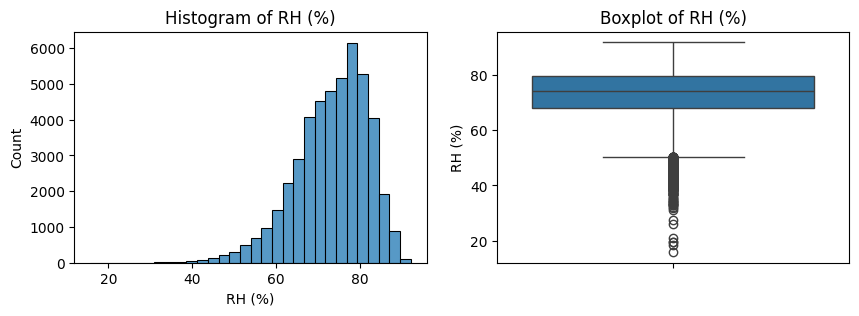

RH (%)- skewness: -0.7675688099948292
RH (%)- kurtosis: 0.7524505862734299


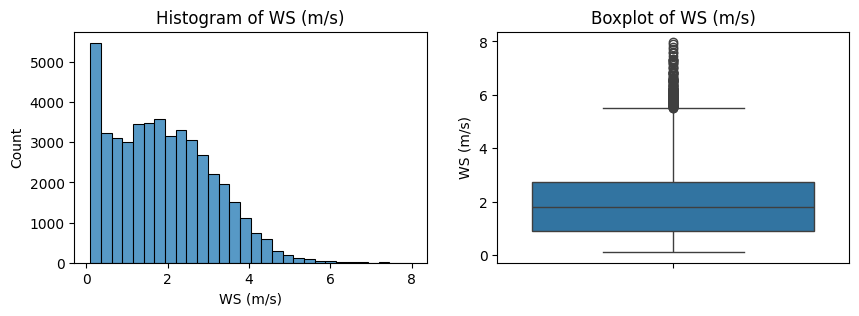

WS (m/s)- skewness: 0.5570399750015516
WS (m/s)- kurtosis: -0.1368420211952155


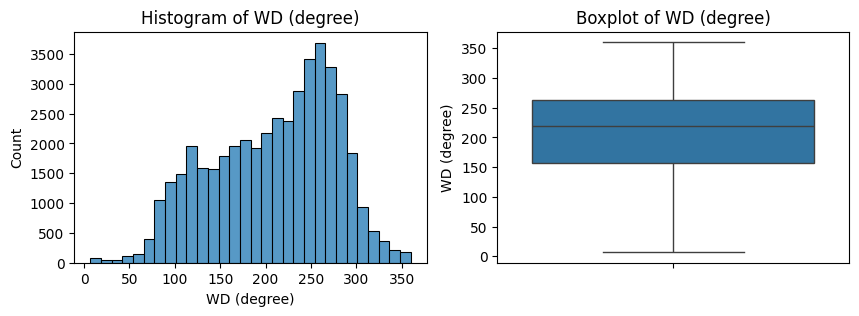

WD (degree)- skewness: -0.34911852741540333
WD (degree)- kurtosis: -0.7480644274386905


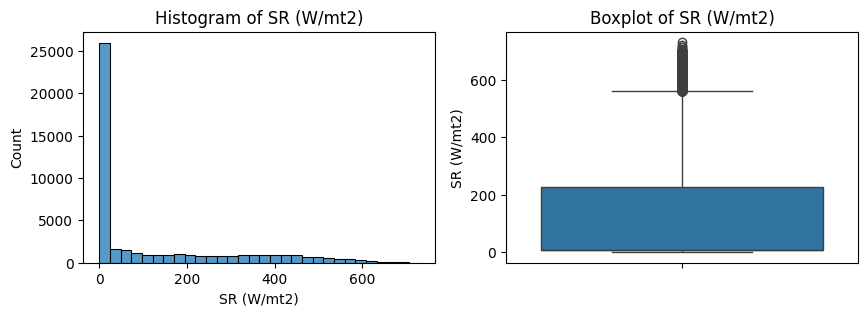

SR (W/mt2)- skewness: 1.2658550457078357
SR (W/mt2)- kurtosis: 0.3000403315050213


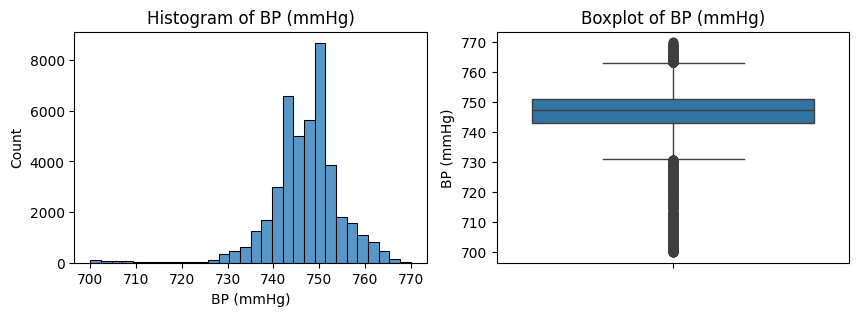

BP (mmHg)- skewness: -1.2407614524936506
BP (mmHg)- kurtosis: 6.11967758495874


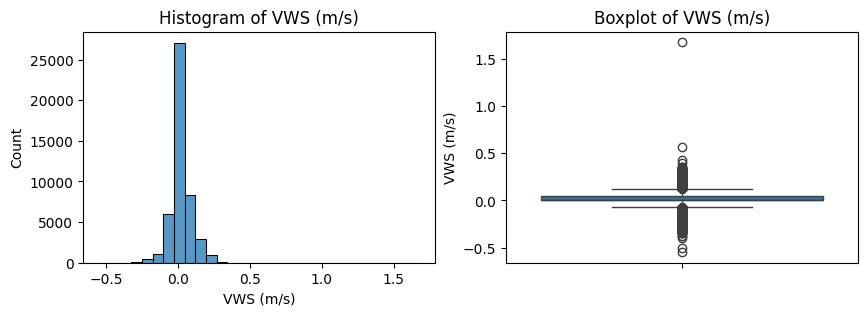

VWS (m/s)- skewness: 0.36516854095996243
VWS (m/s)- kurtosis: 8.734654849669555


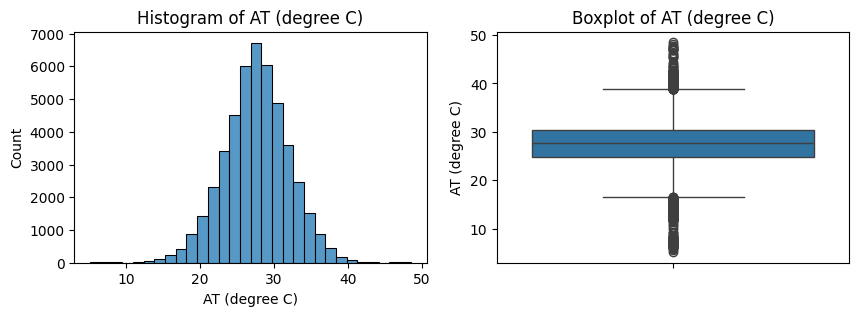

AT (degree C)- skewness: -0.14990869659051165
AT (degree C)- kurtosis: 0.7565053084001243


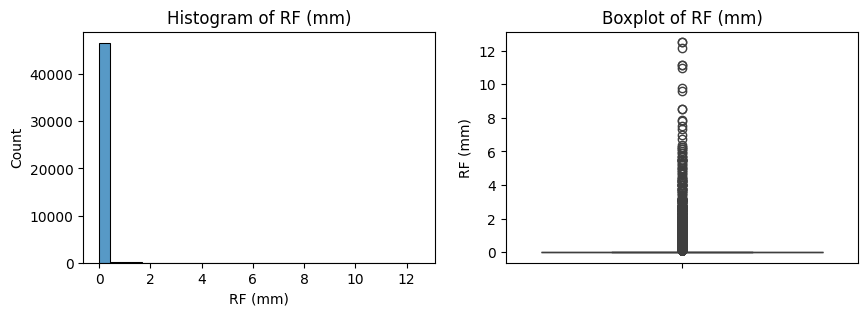

RF (mm)- skewness: 22.378910166308632
RF (mm)- kurtosis: 662.5156496274642


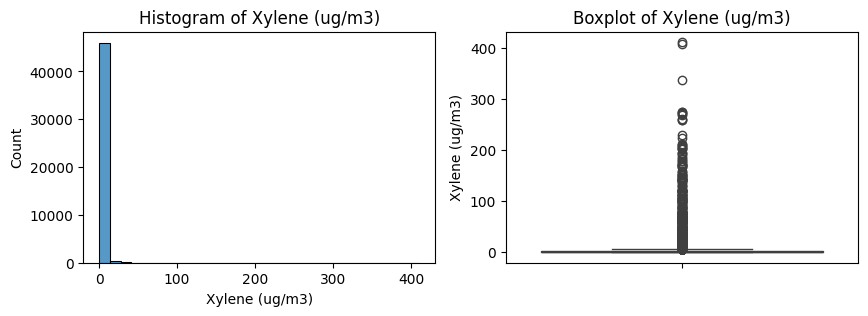

Xylene (ug/m3)- skewness: 20.243137661715526
Xylene (ug/m3)- kurtosis: 563.492816302317


In [9]:
def dist_plot(df, numerical_cols):
  for i in numerical_cols:
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    sns.histplot(df[i], bins=30)
    plt.title(f"Histogram of {i}")

    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")

    plt.show()

    print(f"{i}- skewness: {df[i].skew()}")
    print(f"{i}- kurtosis: {df[i].kurt()}")

dist_plot(df[numerical],numerical)

This function `dist_plot` is designed to visually and statistically explore the distribution of each numerical column in a DataFrame. For every numerical column passed to the function, it creates two side-by-side plots: a histogram to show the distribution of values and a boxplot to highlight the presence of outliers and the spread of the data. After displaying the plots, it prints out the skewness and kurtosis of the column. Skewness indicates the asymmetry of the distribution (with values > 0 showing right skew, < 0 left skew), while kurtosis measures the "tailedness" or how heavy or light the tails of the distribution are compared to a normal distribution. This combination of visual and statistical analysis helps in understanding the shape and nature of the numerical data

## Numeric Correlation Matrix

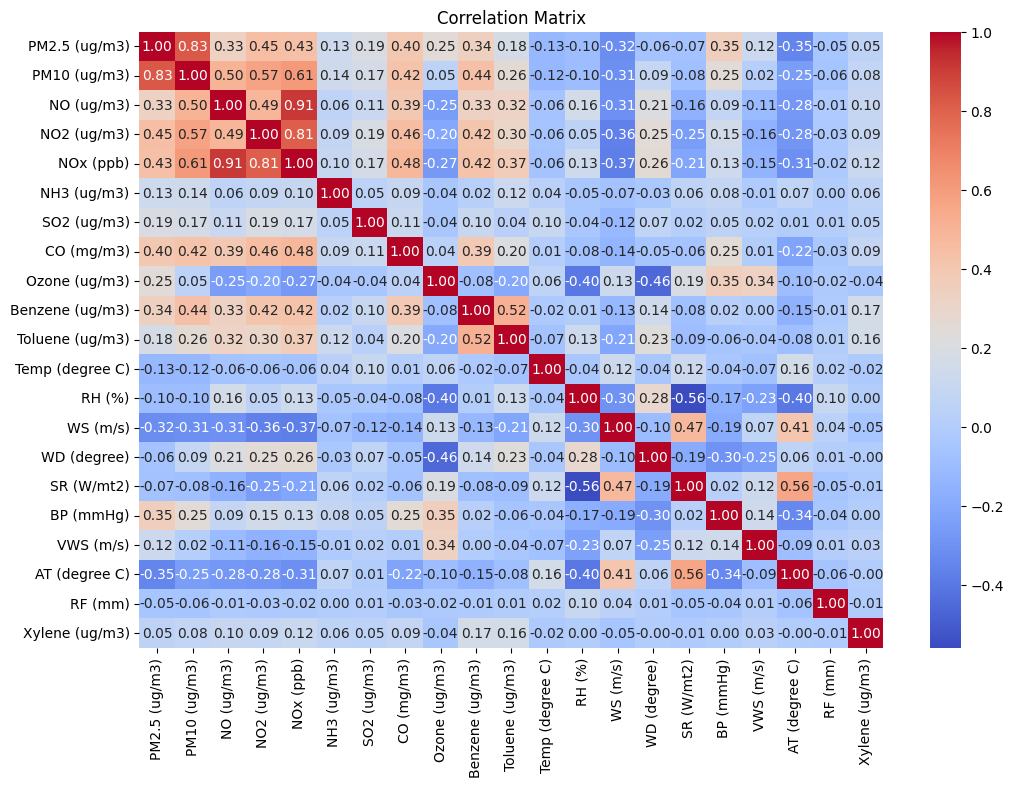

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

This code generates a **correlation matrix heatmap** to visualize the pairwise relationships between numerical features in the DataFrame. It begins by calculating the correlation matrix using `df.corr(numeric_only=True)`, which computes Pearson correlation coefficients only for numerical columns. A heatmap is then created using Seaborn to display these correlations, with the color gradient (`coolwarm`) indicating the strength and direction of the relationships—red for positive, blue for negative. The `annot=True` argument ensures that the exact correlation values are displayed within each cell, and the heatmap is sized to fit comfortably using `figsize=(12, 8)`. This visualization is helpful for identifying multicollinearity and understanding how features are related to one another

# Preprocessing

## Drop "To Date" column

In [ ]:
df.drop('To Date', axis=1, inplace=True)
df

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,NaN,0.58,...,55.22,83.25,1.67,285.50,6.75,737.00,0.03,26.30,0.00,0.65
1,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,NaN,0.45,...,57.48,84.50,2.50,299.50,6.75,736.00,0.05,25.00,1.50,0.50
2,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,NaN,0.53,...,58.67,86.00,0.77,285.67,6.67,736.00,0.03,24.17,0.33,0.43
3,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,144.42,0.75,...,58.93,86.00,1.55,302.50,6.00,735.00,0.08,24.10,0.00,0.63
4,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,42.65,0.78,...,59.88,86.00,2.30,297.25,6.00,735.00,0.08,24.90,0.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,25.00,96.00,17.30,30.80,30.42,6.10,14.15,0.42,3.85,2.92,...,27.75,77.75,2.48,243.50,7.00,743.00,0.00,30.58,0.00,2.90
44276,19.50,103.75,19.70,34.80,34.50,5.25,14.53,0.76,4.00,3.05,...,27.70,79.25,2.00,260.25,7.00,743.25,0.00,30.20,0.00,2.90
44277,36.75,157.50,24.33,35.10,38.45,4.92,14.35,0.93,4.02,4.30,...,27.25,81.25,1.77,268.75,7.00,744.00,0.00,29.73,0.00,3.08
44278,27.50,111.25,22.85,35.10,37.25,4.25,14.55,0.60,3.85,3.25,...,27.20,82.25,2.02,273.50,7.00,744.00,0.00,29.33,0.00,3.25


## Handling Missing Values

In [ ]:
df.isna().sum()

,0
PM2.5 (ug/m3),5402
PM10 (ug/m3),5124
NO (ug/m3),3987
NO2 (ug/m3),4530
NOx (ppb),3197
NH3 (ug/m3),4468
SO2 (ug/m3),6148
CO (mg/m3),3246
Ozone (ug/m3),4875
Benzene (ug/m3),3547


The line `df.isna().sum()` is used to check for **missing values** in a pandas DataFrame. It returns the total number of `NaN` (Not a Number) values in each column. If a column has a non-zero result, it means that column contains missing data. This command is essential during data cleaning, as it helps identify which features may require imputation, removal, or further investigation before modeling or analysis

In [ ]:
# Impute missing values using median
df_numeric = df.select_dtypes(include='number')
df[df_numeric.columns] = df_numeric.fillna(df_numeric.median())

This code snippet fills missing values in all **numerical columns** of the DataFrame using the **median** of each column. First, it selects only the numeric columns with `df.select_dtypes(include='number')`, assigning the result to `df_numeric`. Then, it imputes missing values in those columns using `.fillna(df_numeric.median())`, which replaces each `NaN` with the median of its respective column. Finally, it updates the original DataFrame with the imputed values. Using the median is a robust method for handling missing values, especially when the data contains outliers, as the median is less sensitive to extreme values than the mean

# Handling Anomalies

In [ ]:
# Check if there is negative value in each column
for i in df.select_dtypes(include='number').columns:
    print(f"{i}: {df[df[i] < 0].shape[0]}")

PM2.5 (ug/m3): 0
PM10 (ug/m3): 0
NO (ug/m3): 0
NO2 (ug/m3): 0
NOx (ppb): 0
NH3 (ug/m3): 0
SO2 (ug/m3): 0
CO (mg/m3): 0
Ozone (ug/m3): 0
Benzene (ug/m3): 0
Toluene (ug/m3): 0
Temp (degree C): 0
RH (%): 0
WS (m/s): 0
WD (degree): 0
SR (W/mt2): 0
BP (mmHg): 0
VWS (m/s): 7024
AT (degree C): 0
RF (mm): 0
Xylene (ug/m3): 0


This code checks for the presence of **negative values** in each numerical column of the DataFrame. It loops through all columns with numeric data types, and for each column `i`, it filters the DataFrame to count how many rows have values less than 0 using `df[df[i] < 0].shape[0]`. The result is printed alongside the column name. This is useful for identifying data quality issues, especially in cases where negative values may not make sense (e.g., for features like age, income, or counts), and can help determine whether further cleaning or validation is needed

In [ ]:
df['VWS (m/s)'] = df['VWS (m/s)'].abs()

This line of code replaces all values in the column `'VWS (m/s)'` with their **absolute values** using the `.abs()` function. It ensures that all values in the `'VWS (m/s)'` column are **non-negative**, which is important if negative values are not meaningful in the context of the variable—for example, if `'VWS (m/s)'` represents wind speed, which cannot be negative. This step helps maintain data consistency and correctness during preprocessing

# Windowing

In [ ]:
import numpy as np

target_col_index = df.columns.get_loc("AT (degree C)")

def create_windowed_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, target_col_index])
    return np.array(X), np.array(y)

window_size = 5
X, y = create_windowed_dataset(df.values, window_size)

print(X.shape)
print(y.shape)

(44275, 5, 21)
(44275,)


This code prepares the dataset for **time series modeling** using a sliding window approach. It first identifies the index of the target column `"AT (degree C)"` and defines a function `create_windowed_dataset()` to generate windowed sequences from the full dataset.

Inside the function, for each position in the dataset (except the last few that don't fit into a full window), it collects a sequence of `window_size` rows as features (`X`) and the target value at the next time step (`y`). Specifically, `X` contains time windows of multiple features, while `y` contains the corresponding future value of the `"AT (degree C)"` column. The resulting shapes of `X` and `y` are printed, where `X.shape` is `(samples, timesteps, features)` and `y.shape` is `(samples,)`.

# Splitting

In [ ]:
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

This code splits the windowed time series dataset into **training**, **validation**, and **test** sets using a simple proportion-based approach:

* `train_size` is set to 80% of the total data
* `val_size` is set to 10%
* The remaining 10% is used for testing

The slicing ensures that the **temporal order of the data is preserved**, which is important for time series tasks to avoid data leakage from future to past. `X_train` and `y_train` contain the initial portion of the sequences, `X_val` and `y_val` take the next chunk for validation, and the rest go into `X_test` and `y_test` for final evaluation.

This setup allows you to train your model on past data, tune it on the next portion, and evaluate it on the most recent unseen data—mimicking how a time series model would be deployed in real-world forecasting

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Reshape dari 3D → 2D
X_train_reshaped = X_train.reshape(-1, X_train.shape[2])
X_val_reshaped = X_val.reshape(-1, X_val.shape[2])
X_test_reshaped = X_test.reshape(-1, X_test.shape[2])

# 2. Scaling
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train_reshaped)
X_val_scaled = scaler_X.transform(X_val_reshaped)
X_test_scaled = scaler_X.transform(X_test_reshaped)

# 3. Reshape balik ke 3D
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_val_scaled = X_val_scaled.reshape(X_val.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

This code performs feature scaling on the input sequences using Min-Max normalization, which is crucial for training time series models like LSTM. Since the original input arrays have a 3D shape (samples, time steps, features), they are first reshaped into 2D to fit the expected input format of the `MinMaxScaler`. The scaler is trained only on the training set to prevent data leakage, and then applied to both the validation and test sets. After scaling, the arrays are reshaped back to their original 3D form to be compatible with sequence-based models. This ensures that all features are normalized to a consistent range, improving training stability and model performance

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_val = y_scaler.transform(y_val)
y_test = y_scaler.transform(y_test)

This code scales the target variable `y` using Min-Max normalization, which is important when the model's output is continuous and needs to be constrained within a specific range—typically \[0, 1]. Since the target arrays are initially one-dimensional, they are first reshaped into 2D format using `.reshape(-1, 1)` to match the input requirements of `MinMaxScaler`. The scaler is then fitted on the training target values to learn the appropriate scaling parameters and subsequently applied to the validation and test sets. This process ensures that the target values are consistently scaled, which helps the model learn more effectively and prevents issues caused by large or uneven value ranges.


# Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

timesteps = X.shape[1]
num_features = X.shape[2]
hidden_size = 10

model = Sequential([
    LSTM(hidden_size, input_shape=(timesteps, num_features)),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

This code builds a simple LSTM-based regression model using Keras. The model takes time series input with a shape of `(timesteps, num_features)`, where `timesteps` is the number of past observations used in each input sequence (in this case, 5), and `num_features` represents the number of sensor variables in the dataset. The architecture consists of a single `LSTM` layer with 10 hidden units, followed by a `Dense` output layer with one unit and a `linear` activation function to perform continuous value prediction. This setup is typical for time series forecasting tasks. The model is compiled using the Adam optimizer, with mean squared error (`mse`) as the loss function and mean absolute error (`mae`) as an additional evaluation metric. The `model.summary()` function displays the model's architecture and parameter count.


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0827 - mae: 0.2258 - val_loss: 0.0111 - val_mae: 0.0784
Epoch 2/20
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0091 - mae: 0.0697 - val_loss: 0.0096 - val_mae: 0.0760
Epoch 3/20
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0086 - mae: 0.0686 - val_loss: 0.0096 - val_mae: 0.0757
Epoch 4/20
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0088 - mae: 0.0691 - val_loss: 0.0097 - val_mae: 0.0764
Epoch 5/20
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0085 - mae: 0.0676 - val_loss: 0.0094 - val_mae: 0.0761
Epoch 6/20
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0076 - mae: 0.0661 - val_loss: 0.0068 - val_mae: 0.0653
Epoch 7/20
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0069 - mae: 0.0638 - val_loss: 0.0069 - val_mae: 0.0650
Epoch 8/20
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0068 - mae: 0.0633 - val_loss: 0.0070 - val_mae: 0.0665
Epoch 9/20
1107/1107 ━━━━━━━━━━━━━━━━━

This line of code trains the LSTM model on the training data using the `.fit()` method. The model is trained for 20 epochs with a batch size of 32, meaning that the weights are updated after every 32 samples. It also evaluates performance on the validation set after each epoch by passing `validation_data=(X_val, y_val)`. The `verbose=1` argument ensures that training progress is printed in detail, including loss and metric values for both the training and validation sets. The result of this training process is stored in the `history` object, which contains the recorded loss and metric values per epoch, and can be used later for visualization or performance analysis.


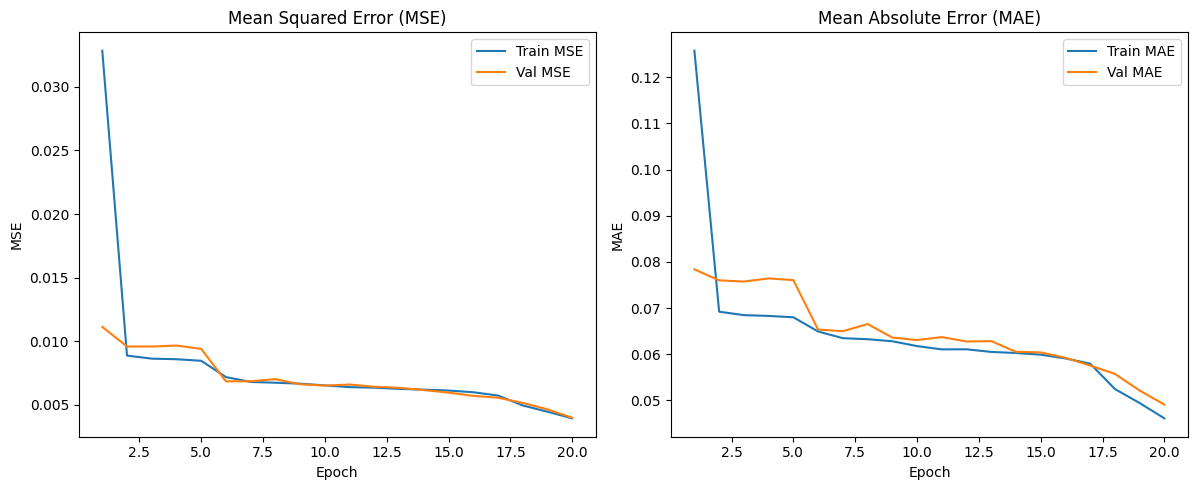

In [ ]:
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs, history.history['loss'], label='Train MSE')
plt.plot(epochs, history.history['val_loss'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, history.history['mae'], label='Train MAE')
plt.plot(epochs, history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

The plots show the training and validation performance of the LSTM model over 20 epochs using two metrics: Mean Squared Error (MSE) and Mean Absolute Error (MAE).

On the **left**, the MSE plot indicates that both the training and validation errors decrease rapidly within the first few epochs and then gradually continue to decline. The lines remain close to each other throughout the training process, suggesting that the model is learning well and not overfitting.

On the **right**, the MAE plot shows a similar trend, with a steep drop in error during the initial epochs followed by a steady improvement. The validation MAE closely tracks the training MAE, reinforcing that the model generalizes well to unseen data.

Overall, the plots suggest that the model is well-trained, stable, and not suffering from overfitting or underfitting

# Modified Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model_mod = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(16),
    Dense(1, activation='linear')
])

model_mod.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history_mod = model_mod.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0098 - mae: 0.0696 - val_loss: 0.0046 - val_mae: 0.0543
Epoch 2/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0043 - mae: 0.0490 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 3/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0034 - mae: 0.0420 - val_loss: 0.0020 - val_mae: 0.0351
Epoch 4/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0020 - mae: 0.0304 - val_loss: 0.0014 - val_mae: 0.0280
Epoch 5/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0015 - mae: 0.0247 - val_loss: 8.4487e-04 - val_mae: 0.0206
Epoch 6/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0013 - mae: 0.0229 - val_loss: 8.2997e-04 - val_mae: 0.0205
Epoch 7/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0012 - mae: 0.0215 - val_loss: 7.4567e-04 - val_mae: 0.0193
Epoch 8/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0012 - mae: 0.0208 - val_loss: 0.0012 - val_mae: 0.0277
Epoch 9/50
1107/1107 ━━

This code builds and trains an enhanced LSTM model using a deeper architecture and early stopping to prevent overfitting. The model consists of two LSTM layers: the first with 32 units and `return_sequences=True` to pass the full sequence to the next LSTM layer, and the second with 16 units. A final dense layer with a linear activation is used for output, suitable for regression tasks.

The model is compiled with the Adam optimizer, a learning rate of 0.001, and uses mean squared error (MSE) as the loss function, along with mean absolute error (MAE) as an evaluation metric.

Training is performed for up to 50 epochs with a batch size of 32, and validation data is used to monitor performance. An `EarlyStopping` callback is applied with a patience of 5 epochs—if the validation loss does not improve for 5 consecutive epochs, training stops early and the best weights are restored. This helps avoid overfitting and reduces training time while preserving model performance.

# Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, X, y, name=""):
    pred = model.predict(X)
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    return mse, mae, r2

evaluate(model, X_test, y_test, "Baseline Model")
evaluate(model_mod, X_test, y_test, "Modified Model")

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Baseline Model - MSE: 0.0046, MAE: 0.0524, R2: 0.5781
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Modified Model - MSE: 0.0007, MAE: 0.0165, R2: 0.9396


(0.0006541225237974563, 0.01654654051811421, 0.9395672910635859)

These evaluation results clearly show that the **modified LSTM model significantly outperforms the baseline model**:

* The **Baseline Model** achieved an MSE of **0.0046**, MAE of **0.0524**, and R² of **0.5781**, which indicates moderate predictive performance but with noticeable error and limited variance explained.

* The **Modified Model** achieved a much lower MSE of **0.0007**, MAE of **0.0165**, and a very high R² of **0.9396**, meaning it can explain over 93% of the variance in the target variable.

The large improvements across all metrics—especially in the **R² score**—suggest that the deeper LSTM architecture with two layers and early stopping **captured the temporal dependencies more effectively**, leading to better generalization and more accurate predictions.


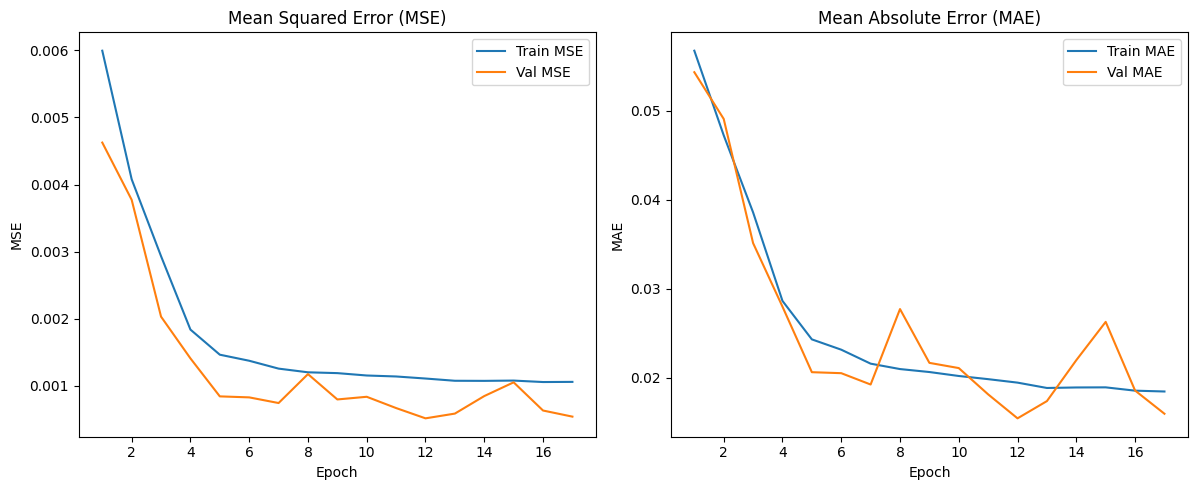

In [ ]:
epochs = range(1, len(history_mod.history['loss']) + 1)

plt.figure(figsize=(18, 5))

# === Plot MSE (Loss) ===
plt.subplot(1, 3, 1)
plt.plot(epochs, history_mod.history['loss'], label='Train MSE')
plt.plot(epochs, history_mod.history['val_loss'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')
plt.legend()

# === Plot MAE ===
plt.subplot(1, 3, 2)
plt.plot(epochs, history_mod.history['mae'], label='Train MAE')
plt.plot(epochs, history_mod.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

The plots illustrate the training and validation performance of the **modified LSTM model** using Mean Squared Error (MSE) and Mean Absolute Error (MAE) across epochs. Both metrics show a consistent downward trend, indicating that the model is effectively learning and improving over time. The validation lines closely follow the training lines, and even perform slightly better at some epochs, which suggests **no signs of overfitting**.

Now, to answer the bonus question:

Yes, this problem is very well suited for a **multivariate time series** approach. The task involves predicting a continuous target variable (`AT (degree C)`) based on multiple input features recorded over time, such as sensor readings. The key indicators that justify using a multivariate time series model include:

1. **Temporal Dependency** – The data is sequential, and the prediction of the target at a certain time depends on values from previous time steps.
2. **Multiple Features** – The input consists of more than one variable (multivariate), which jointly influence the future target value.
3. **Windowing Used** – The creation of sliding windows (using past time steps as input) confirms that the problem is treated as a time series forecasting task.

The successful use of LSTM, a model specifically designed for sequence learning along with performance metrics and visualizations, further supports that this is a valid and effective time series problem